# TP Final - Exploratory Analyse

In [33]:
# data wrangling
import pandas as pd
import numpy as np
import os
import nltk

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
%matplotlib inline


In [7]:
datadir = '/home/sebacastillo/research_tools/data/'
db_name= 'Libro1.csv' # evaluar con otros data
df= pd.read_csv(datadir + db_name, sep=';', skiprows=4, encoding='windows-1254')
df.columns = df.columns.str.replace(' ','_')


/home/sebacastillo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,6,7,9,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.shape

(4372, 223)

El data set tiene elevado número de columnas. Vamos a tratar de bajar esta dim.

In [22]:
columnas = df.columns

In [23]:
for i in columnas:
    print(i)

_RANGE_
_TYPE_
_SIZE_
_reorder_buyer_
_CODE_
Condition
Status
ABC
stock_group
LAST_BUY_PRICE_
ON_HAND
ALLOCATED_
ON_ORDER
BACK_ORD
IN_TRANSIT
SUPPLIER
SUPP
10
9
8
7
6
5
4
_Avg_Sales_3_months_
_Avg_Sales_6_Months_
_Sales_Average_
_Average_Sales_for_"0"_
_Avg_vs_Fcst_
_Sales__Avg_
_Sales_Avg_last_5_mths_
_Sales_Avg_Location_
_Written_sales_10_
Written_sales_9
Written_sales_8
Written_sales_7
Written_sales_6
Written_sales_5
Written_sales_4
Written_sales_3
Written_sales_2
_SF_10_
_SF_11_
_SF_12_
_SF_1_
_SF_2_
_SF_3_
Stock_avail_at_WH_in_units
Stock_avail_at_Stores_in_units
Stock_+_PO_position_in_units
_Stock_position_in_mths_
_Min_Stock_Level_in_mths_
_Safety_Stock_in_mths_
_SOH_Position_
_Lead-times_in_mths_
_Pack_size_
_MOQ_
_Order_QTY_to_Confirm_
Floor_Stock
_Qty_to_Order__
_Order_Volume_
_months_after_order_
_months_after_order_with_stores_
_Cubic_Mtrs_
_Item_Weight_
_Order_Weight_
_Order_$_value_
_on_hand_Value_
_On_Hand_+_orders_
_On_order_Value_
_WH_Cubs_Required__
_ON_ORDER_+_TRANSI

Vamos a eliminar columnas según ciertos patrones: _Written_sales_*, - Written_sales*, - _USD* y [numbers] '?Written_sal*|*USD*|\\d'

In [29]:
df = df.loc[:,~df.columns.str.contains('\\d', case=False, regex=True)] 
df.shape

(4372, 90)

In [30]:
df.columns

Index(['_RANGE_', '_TYPE_', '_SIZE_', '_reorder_buyer_', '_CODE_', 'Condition',
       'Status', 'ABC', 'stock_group', 'LAST_BUY_PRICE_', 'ON_HAND',
       'ALLOCATED_', 'ON_ORDER', 'BACK_ORD', 'IN_TRANSIT', 'SUPPLIER', 'SUPP',
       '_Sales_Average_', '_Avg_vs_Fcst_', '_Sales__Avg_',
       '_Sales_Avg_Location_', 'Stock_avail_at_WH_in_units',
       'Stock_avail_at_Stores_in_units', 'Stock_+_PO_position_in_units',
       '_Stock_position_in_mths_', '_Min_Stock_Level_in_mths_',
       '_Safety_Stock_in_mths_', '_SOH_Position_', '_Lead-times_in_mths_',
       '_Pack_size_', '_MOQ_', '_Order_QTY_to_Confirm_', 'Floor_Stock',
       '_Qty_to_Order__', '_Order_Volume_', '_months_after_order_',
       '_months_after_order_with_stores_', '_Cubic_Mtrs_', '_Item_Weight_',
       '_Order_Weight_', '_Order_$_value_', '_on_hand_Value_',
       '_On_Hand_+_orders_', '_On_order_Value_', '_WH_Cubs_Required__',
       '_ON_ORDER_+_TRANSIT_', '_Stock_after_allocated_&_BO_',
       '_Avail+Transit_', 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   _RANGE_                                4368 non-null   object 
 1   _TYPE_                                 4368 non-null   object 
 2   _SIZE_                                 4368 non-null   object 
 3   _reorder_buyer_                        4368 non-null   object 
 4   _CODE_                                 4368 non-null   object 
 5   Condition                              2270 non-null   object 
 6   Status                                 4368 non-null   object 
 7   ABC                                    2785 non-null   object 
 8   stock_group                            4368 non-null   float64
 9   LAST_BUY_PRICE_                        4368 non-null   object 
 10  ON_HAND                                4368 non-null   float64
 11  ALLO

In [31]:
df.describe()

,stock_group,ON_HAND,ALLOCATED_,ON_ORDER,BACK_ORD,IN_TRANSIT,Stock_avail_at_WH_in_units,Stock_avail_at_Stores_in_units,Stock_+_PO_position_in_units,Floor_Stock,_Stock_after_allocated_&_BO_,_Avail+Transit_,Container,Written_sales_,PENRITH__(YES/NO)
count,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.0,4368.000000,4368.000000,4368.000000,4368.000000,4368.0,4368.000000,4368.000000
mean,1892.981227,21.641255,4.318910,20.352335,2.003205,10.131868,15.319139,0.0,45.803342,20.644002,15.319139,25.451236,0.0,0.728480,116.242606
std,2505.904813,51.062718,12.532447,64.868320,11.199831,42.805545,45.414013,0.0,102.043492,45.542581,45.414013,62.545627,0.0,3.423607,250.409982
min,0.000000,-1.000000,-2.000000,0.000000,-2.000000,0.000000,-360.000000,0.0,-33.000000,-1.000000,-360.000000,-360.000000,0.0,-3.000000,1.000000
25%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.089750
50%,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,3.107000
75%,4008.000000,19.000000,3.000000,5.000000,0.000000,0.000000,12.250000,0.0,48.000000,21.000000,12.250000,23.000000,0.0,0.000000,3.107000
max,9000.000000,617.000000,318.000000,1088.000000,360.000000,908.000000,562.000000,0.0,1941.000000,522.000000,562.000000,869.000000,0.0,66.000000,999.000000


Algunas columnas no tienen valores, están en blanco, vamos a eliminar

In [41]:
df = df.drop(columns=['Stock_avail_at_Stores_in_units', 'Container'])

Vamos a eliminar NA

In [42]:
df.shape

(1809, 88)

In [43]:
df = df.dropna()

In [89]:
df.shape

(1809, 88)

Vamos a graficar los datos para ver correlaciones.

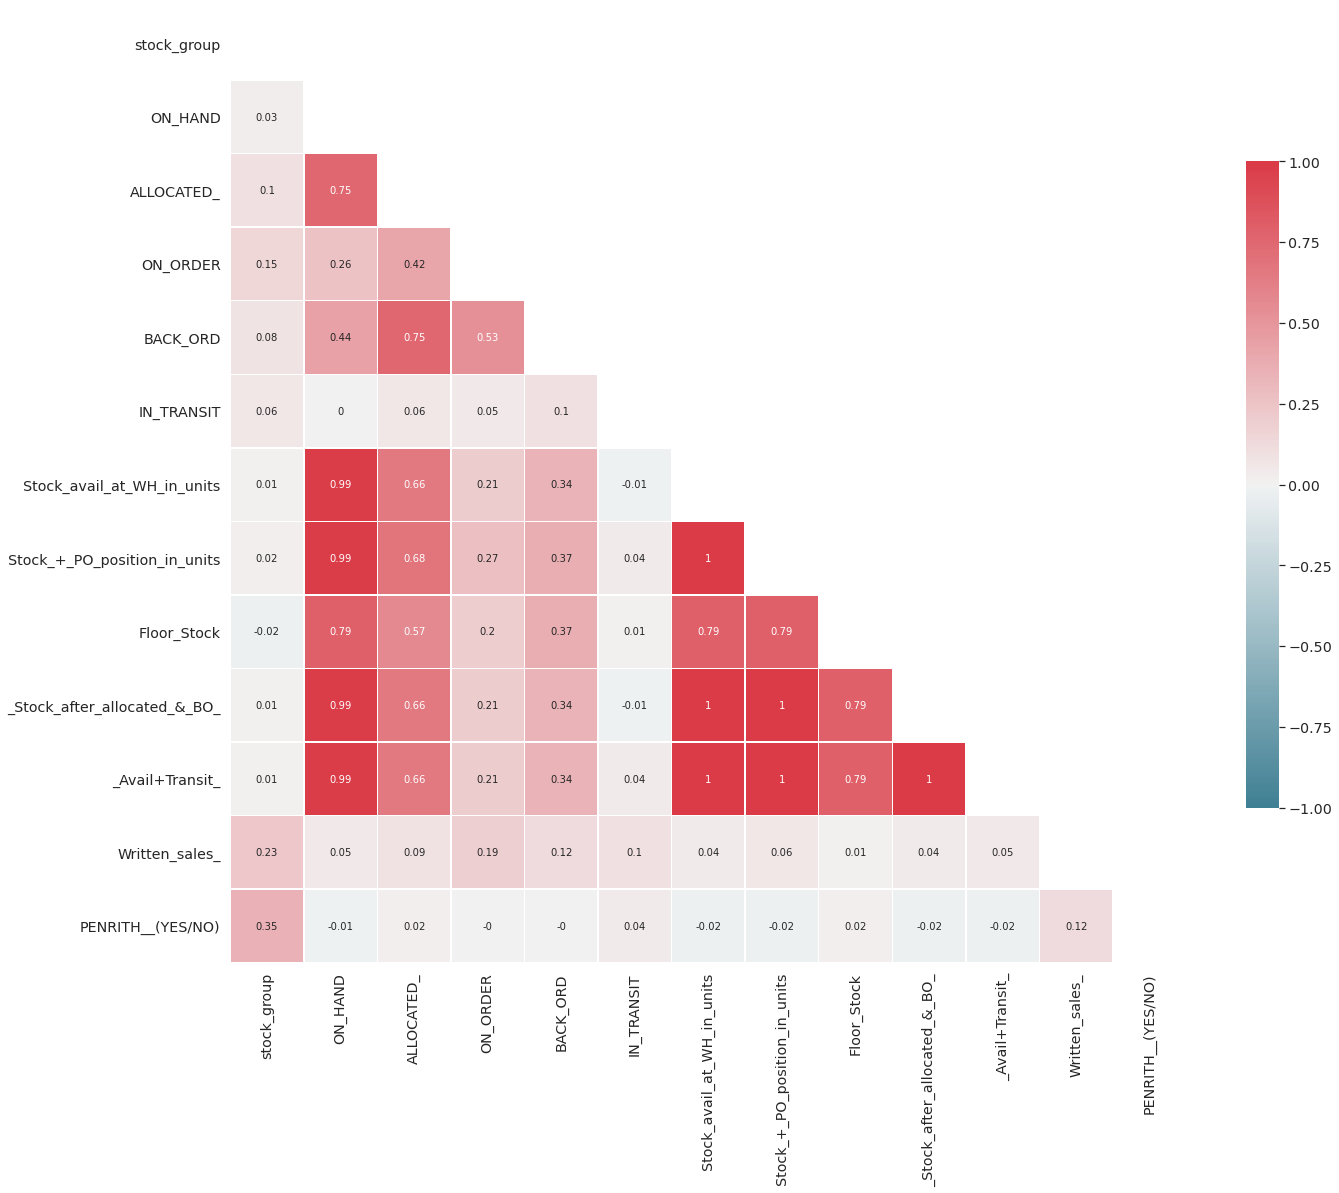

In [45]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# 1er intento de ordenar datos via K-mean clustering

In [47]:
from sklearn.cluster import KMeans
import AA_utils 
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import MinMaxScaler

Nos quedamos con los atributos numéricos

In [121]:
df_numeric = df.select_dtypes(include=np.number)

In [122]:
df_numeric.shape

(1809, 13)

Extraemos las columnas para luego reponer en nuestro data set clasificado

In [123]:
features = df_numeric.columns.values

In [124]:
# Normalización
scaler = MinMaxScaler()
df_numeric = scaler.fit_transform(df_numeric)

Vemos clusters óptimos

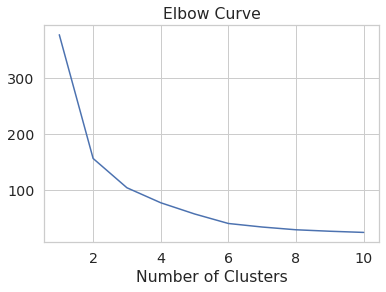

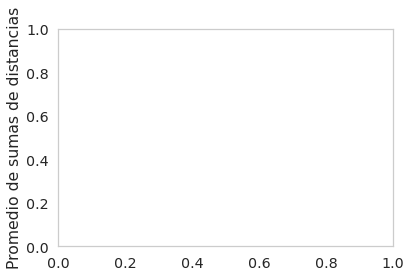

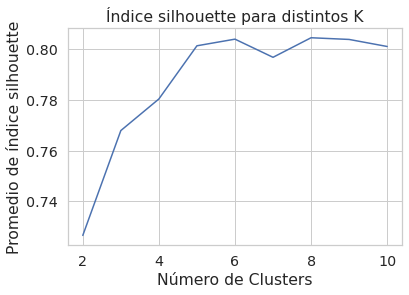

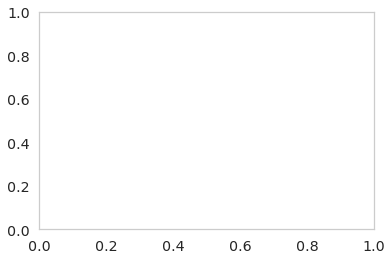

In [125]:
#%% visualizar curva elbow y silhouette
AA_utils.graficar_punto_elbow(df_numeric, 10)
AA_utils.graficar_indice_silhouette(df_numeric, 10)

K = 3 The average silhouette_score is : 0.7679744284846651


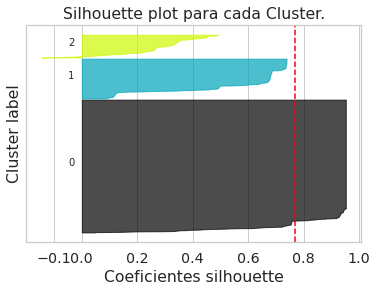

In [126]:
# Modelado de datos
# Parametros
k= 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_numeric)

# clasificar cada patrón con los centroides
kmeans_labels = kmeans.predict(df_numeric)

# centroides
centers = kmeans.cluster_centers_

# analisis del clustering
silhouette_avg = silhouette_score(df_numeric, kmeans_labels)
print("K =", k, "The average silhouette_score is :", silhouette_avg)
AA_utils.graficar_indice_silhouette_k(df_numeric, k)

In [127]:
df_numeric_clus = pd.DataFrame(df_numeric)
df_numeric_clus['clusters'] = kmeans_labels

In [128]:
features = np.insert(features, 0, 'x')
features

array(['x', 'stock_group', 'ON_HAND', 'ALLOCATED_', 'ON_ORDER',
       'BACK_ORD', 'IN_TRANSIT', 'Stock_avail_at_WH_in_units',
       'Stock_+_PO_position_in_units', 'Floor_Stock',
       '_Stock_after_allocated_&_BO_', '_Avail+Transit_',
       'Written_sales_', 'PENRITH__(YES/NO)'], dtype=object)

In [ ]:
names = dict(enumerate(features.flatten(), 1))
names

In [133]:
df_numeric_clus.rename(columns=names, inplace=True)

In [134]:
df_numeric_clus.head()

,0,x,stock_group,ON_HAND,ALLOCATED_,ON_ORDER,BACK_ORD,IN_TRANSIT,Stock_avail_at_WH_in_units,Stock_+_PO_position_in_units,Floor_Stock,_Stock_after_allocated_&_BO_,_Avail+Transit_,clusters
0,0.142979,0.001618,0.014085,0.000000,0.000000,0.0,0.017483,0.008818,0.001916,0.017483,0.012302,0.068966,0.001027,0
1,0.142270,0.001618,0.014085,0.000000,0.000000,0.0,0.017483,0.008818,0.001916,0.017483,0.012302,0.068966,0.001027,0
2,0.143830,0.203883,0.140845,0.000000,0.000000,0.0,0.204545,0.197531,0.063218,0.204545,0.200351,0.137931,0.002054,0
3,0.144397,0.169903,0.063380,0.037736,0.000000,0.0,0.187063,0.183422,0.090038,0.187063,0.182777,0.103448,0.003082,0
4,0.143972,0.263754,0.091549,0.037736,0.068966,0.0,0.277972,0.275132,0.107280,0.277972,0.274165,0.172414,0.004110,0


In [135]:
df_numeric_clus.tail()

,0,x,stock_group,ON_HAND,ALLOCATED_,ON_ORDER,BACK_ORD,IN_TRANSIT,Stock_avail_at_WH_in_units,Stock_+_PO_position_in_units,Floor_Stock,_Stock_after_allocated_&_BO_,_Avail+Transit_,clusters
1804,0.0,0.001618,0.014085,0.0,0.0,0.0,0.017483,0.008818,0.0,0.017483,0.012302,0.068966,0.002164,0
1805,0.0,0.001618,0.014085,0.0,0.0,0.0,0.017483,0.008818,0.0,0.017483,0.012302,0.068966,0.002164,0
1806,0.0,0.001618,0.014085,0.0,0.0,0.0,0.017483,0.008818,0.0,0.017483,0.012302,0.068966,0.002164,0
1807,0.0,0.001618,0.014085,0.0,0.0,0.0,0.017483,0.008818,0.0,0.017483,0.012302,0.068966,0.002164,0
1808,0.0,0.001618,0.014085,0.0,0.0,0.0,0.017483,0.008818,0.0,0.017483,0.012302,0.068966,0.002164,0
